In [1]:
import numpy as np
from scipy.stats import norm
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def blackScholes(r, S, K, T, sigma, type):
    """
    params:
        r: risk-free rate
        S: initial stock price
        K: strike price
        T: maturity in years
        sigma: volatility
        type: call or put
    return:
        option price
    Calculates the Black-Scholes option price for a call or put option.
    """
    d1 = (np.log(S/K) + (r + sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    try:
        if type == 'call':
            return S*norm.cdf(d1, 0, 1) - K*np.exp(-r*T)*norm.cdf(d2, 0, 1)
        elif type == 'put':
            return K*np.exp(-r*T)*norm.cdf(-d2, 0, 1) - S*norm.cdf(-d1, 0, 1)
    except:
        print("Please check if all inputs are valid.")

In [3]:
## Underlying Index: NIFTY 19,265.80 As on 25-Aug-2023 15:30:00 IST
curPrice = 19265.80

In [4]:
df = pd.read_csv('optiondata_07SEP.csv')
df.head()

,IVcall,CALL,STRIKE,PUT,IVput
0,6.73,255.55,19100,80.90,12.02
1,6.68,215.00,19150,96.00,11.96
2,7.20,184.30,19200,115.00,12.03
3,7.39,154.25,19250,136.50,12.12
4,7.67,129.25,19300,157.55,12.02


In [5]:
originalPricesCalls = []
predictedPricesCalls = []
originalPricesPuts = []
predictedPricesPuts = []
strikePrices = []
# Iterate over each option
for row in df.itertuples():
    [callVol, callPrice, strikePrice, putPrice, putVol] = row[1:]
    predictedCallPrice = blackScholes(0.06, curPrice, strikePrice, 13/365, callVol/100, 'call')
    predictedPutPrice = blackScholes(0.06, curPrice, strikePrice, 13/365, putVol/100, 'put')
    strikePrices.append(strikePrice)
    originalPricesCalls.append(callPrice)
    predictedPricesCalls.append(predictedCallPrice)
    originalPricesPuts.append(putPrice)
    predictedPricesPuts.append(predictedPutPrice)

Text(0, 0.5, 'Call Option Price')

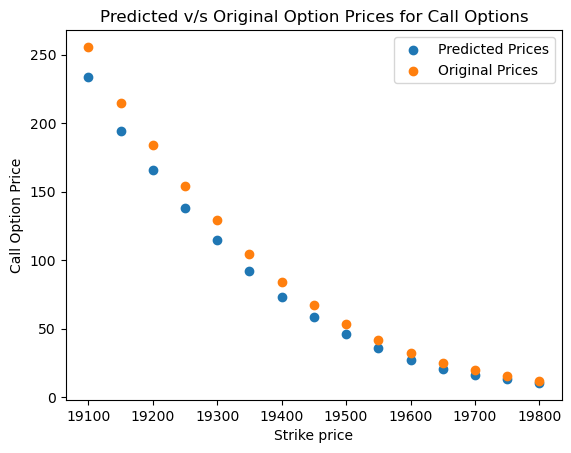

In [6]:
plt.scatter(strikePrices, predictedPricesCalls)
plt.scatter(strikePrices, originalPricesCalls)
plt.title("Predicted v/s Original Option Prices for Call Options")
plt.legend(["Predicted Prices", "Original Prices"])
plt.xlabel("Strike price")
plt.ylabel("Call Option Price")

Text(0, 0.5, 'Put Option Price')

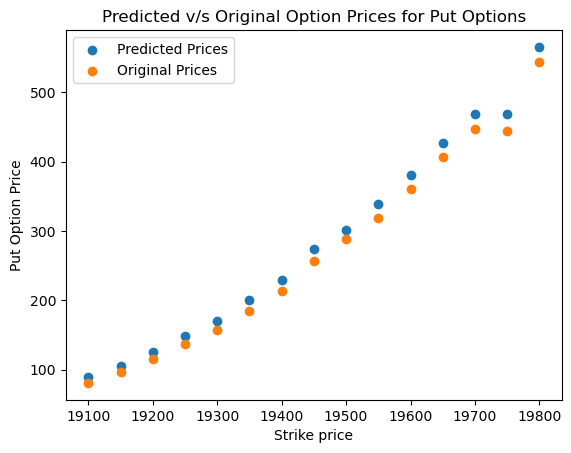

In [7]:
plt.scatter(strikePrices, predictedPricesPuts)
plt.scatter(strikePrices, originalPricesPuts)
plt.title("Predicted v/s Original Option Prices for Put Options")
plt.legend(["Predicted Prices", "Original Prices"])
plt.xlabel("Strike price")
plt.ylabel("Put Option Price")